In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime
import seaborn as sns
%matplotlib inline


In [2]:
data=pd.read_csv("train.csv", parse_dates = [0])

In [3]:
data['weather'].replace(1, 'Clear',inplace=True) 
data['weather'].replace(2, 'Mist',inplace=True)
data['weather'].replace(3, 'Light snow',inplace=True) 
data['weather'].replace(4, 'Heavy rain',inplace=True)

data['season'].replace(1, 'Spring',inplace=True) 
data['season'].replace(2, 'Summer',inplace=True)
data['season'].replace(3, 'Fall',inplace=True) 
data['season'].replace(4, 'Winter',inplace=True)

data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1


In [4]:
data['dayofweek'] = data['datetime'].dt.dayofweek
data['hour'] = data['datetime'].dt.hour

In [5]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek,hour
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,5,0
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,5,1
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,5,2
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,5,3
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,5,4


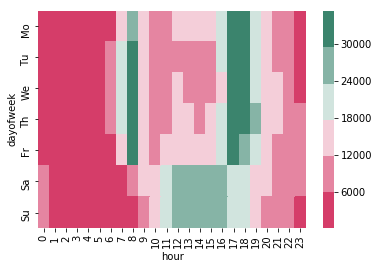

In [6]:
x_mat = data.pivot_table('count', 'dayofweek','hour', aggfunc='sum', fill_value = -1000)
mask = (x_mat < 0)
g = sns.heatmap(x_mat, cmap = sns.diverging_palette(00, 160, n=6),yticklabels = ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su'], mask = mask)
g.set_facecolor('yellow')

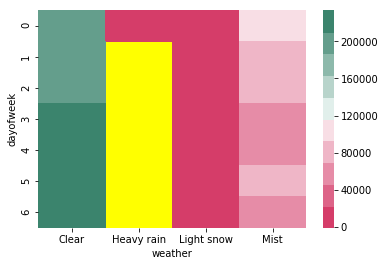

In [7]:
x_mat = data.pivot_table('count', 'dayofweek','weather', aggfunc='sum', fill_value = -1000)
mask = (x_mat < 0)
g = sns.heatmap(x_mat, cmap = sns.diverging_palette(00, 160, n=10), mask = mask)
g.set_facecolor('yellow')

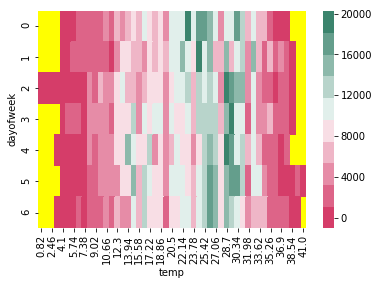

In [8]:
x_mat = data.pivot_table('count', 'dayofweek','temp', aggfunc='sum', fill_value = -1000)
mask = (x_mat < 0)
g = sns.heatmap(x_mat, cmap = sns.diverging_palette(00, 160, n=10), mask = mask)
g.set_facecolor('yellow')

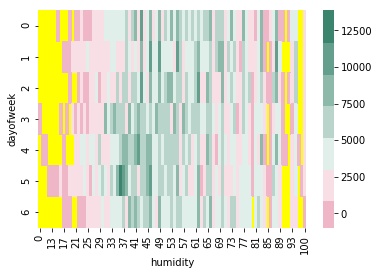

In [9]:
x_mat = data.pivot_table('count', 'dayofweek','humidity', aggfunc='sum', fill_value = -1000)
mask = (x_mat < 0)
g = sns.heatmap(x_mat, cmap = sns.diverging_palette(00, 160, n=10), center = 3000, mask = mask)
g.set_facecolor('yellow')

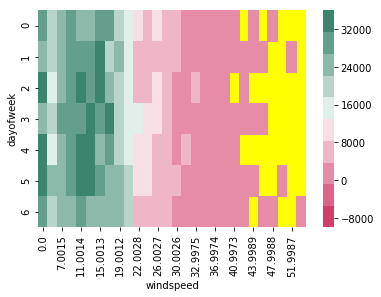

In [10]:
x_mat = data.pivot_table('count', 'dayofweek','windspeed', aggfunc='sum', fill_value = -10000)
mask = x_mat < 0
g = sns.heatmap(x_mat, cmap = sns.diverging_palette(00, 160, n=10), mask = mask)
g.set_facecolor('yellow')

In [11]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'dayofweek', 'hour'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null object
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null object
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dayofweek     10886 non-null int64
hour          10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8), object(2)
memory usage: 1.2+ MB


In [13]:
X=pd.get_dummies(data.drop('datetime',1))

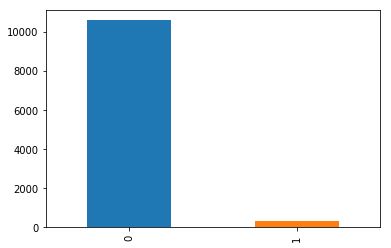

In [14]:
X['holiday'].value_counts().plot.bar()


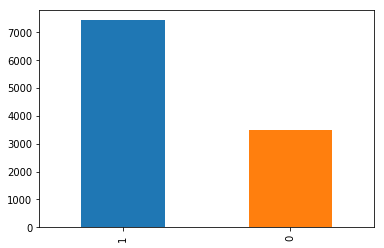

In [15]:
X['workingday'].value_counts().plot.bar()

In [16]:
X.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'dayofweek', 'hour', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter', 'weather_Clear',
       'weather_Heavy rain', 'weather_Light snow', 'weather_Mist'],
      dtype='object')

In [17]:
X.shape

(10886, 19)

In [18]:
import seaborn as sns

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


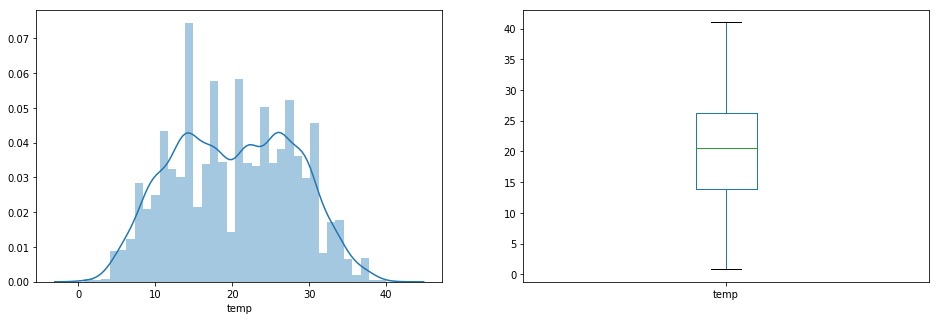

In [19]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X['temp']); 
plt.subplot(122)
X['temp'].plot.box(figsize=(16,5)) 
plt.show()

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


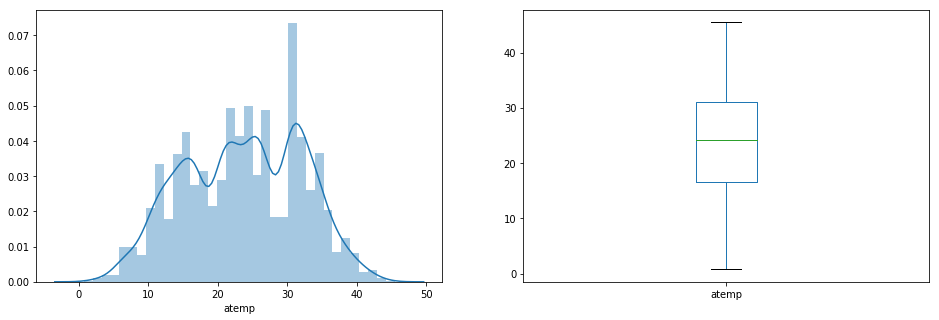

In [20]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X['atemp']); 
plt.subplot(122)
X['atemp'].plot.box(figsize=(16,5)) 
plt.show()

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


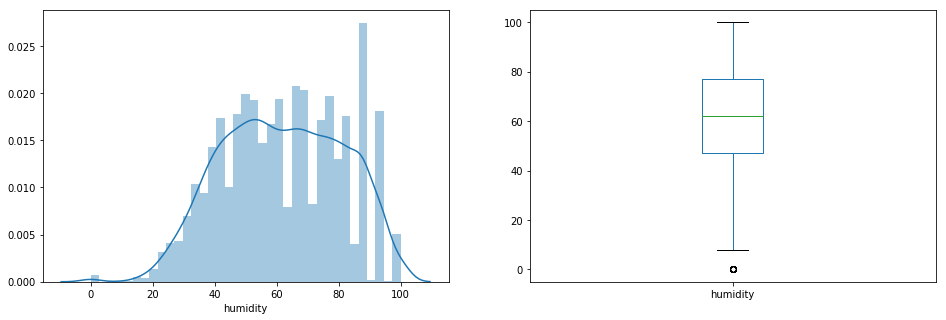

In [21]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X['humidity']); 
plt.subplot(122)
X['humidity'].plot.box(figsize=(16,5)) 
plt.show()

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


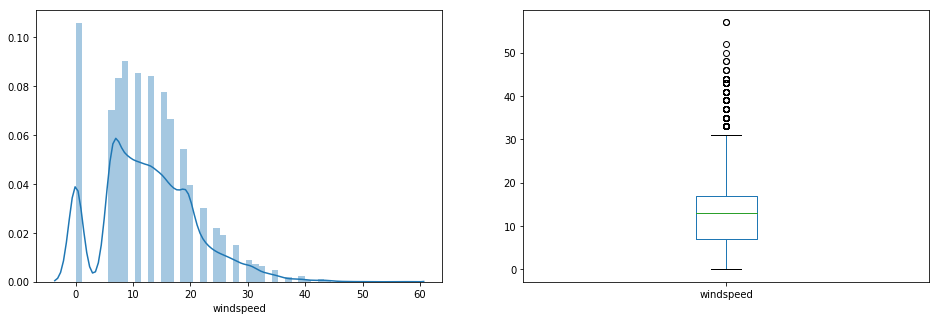

In [22]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X['windspeed']);
plt.subplot(122)
X['windspeed'].plot.box(figsize=(16,5)) 
plt.show()

In [23]:
type(X['temp'].value_counts())

pandas.core.series.Series

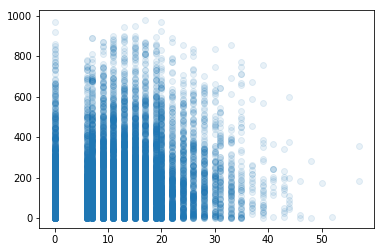

In [24]:
plt.scatter(X['windspeed'], X['count'], alpha = 0.1)
plt.show()

In [25]:
X.isnull().sum()

holiday               0
workingday            0
temp                  0
atemp                 0
humidity              0
windspeed             0
casual                0
registered            0
count                 0
dayofweek             0
hour                  0
season_Fall           0
season_Spring         0
season_Summer         0
season_Winter         0
weather_Clear         0
weather_Heavy rain    0
weather_Light snow    0
weather_Mist          0
dtype: int64

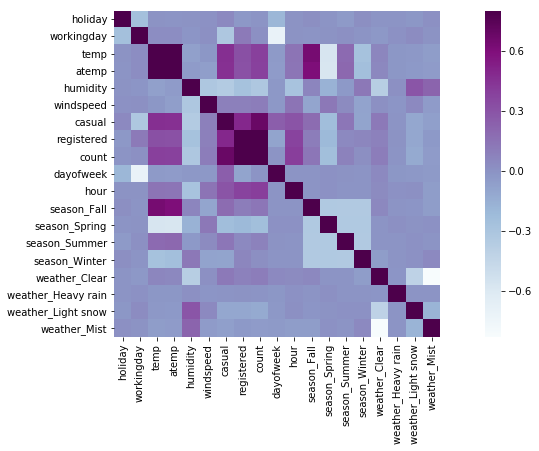

In [26]:
matrix = X.corr()
f, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

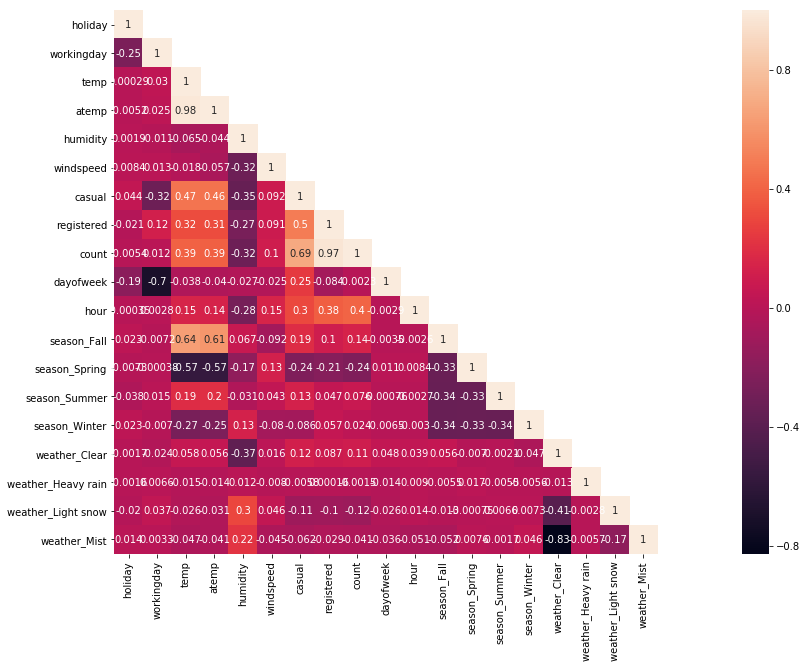

In [27]:
corrMat = X.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
fig, ax= plt.subplots(figsize=(30, 10))
sns.heatmap(corrMat, mask=mask,vmax=1., square=True,annot=True)

In [28]:
X.corr()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek,hour,season_Fall,season_Spring,season_Summer,season_Winter,weather_Clear,weather_Heavy rain,weather_Light snow,weather_Mist
holiday,1.000000,-0.250491,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.191832,-0.000354,0.022790,-0.007336,-0.038250,0.022751,-0.001708,-0.001644,-0.019514,0.013868
workingday,-0.250491,1.000000,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.704267,0.002780,-0.007194,-0.000379,0.014620,-0.007048,-0.024078,0.006562,0.036643,0.003324
temp,0.000295,0.029966,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,-0.038466,0.145430,0.635975,-0.565655,0.192661,-0.266220,0.058430,-0.014800,-0.025715,-0.046925
atemp,-0.005215,0.024660,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,-0.040235,0.140343,0.607090,-0.569082,0.204421,-0.245690,0.055825,-0.013901,-0.031154,-0.040792
humidity,0.001929,-0.010880,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.026507,-0.278011,0.067308,-0.166208,-0.031095,0.129018,-0.374837,0.012010,0.295894,0.222398
windspeed,0.008409,0.013373,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.024804,0.146631,-0.091521,0.128819,0.042991,-0.079535,0.015920,-0.007979,0.045597,-0.045016
casual,0.043799,-0.319111,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.246959,0.302045,0.187726,-0.235222,0.132405,-0.086258,0.119728,-0.005760,-0.108853,-0.062184
registered,-0.020956,0.119460,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,-0.084427,0.380540,0.102142,-0.207278,0.046969,0.056961,0.086621,0.000155,-0.104936,-0.028997
count,-0.005393,0.011594,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,-0.002283,0.400601,0.136942,-0.237704,0.075681,0.023704,0.105246,-0.001459,-0.117519,-0.041329
dayofweek,-0.191832,-0.704267,-0.038466,-0.040235,-0.026507,-0.024804,0.246959,-0.084427,-0.002283,1.000000,-0.002925,-0.003505,0.010789,-0.000757,-0.006464,0.048353,-0.014412,-0.026177,-0.035776
